In [1]:
import pid_df
from seaborn import heatmap,scatterplot,catplot
from pandas import DataFrame
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from pandas import Series,concat
from numpy import array,triu_indices
from math import fabs


# Establish data frame object

Using .csv or .json files, prepare data frame object for further manipulation or analysis. The file name, particle type, and the fraction of the total file you want to use to build the data frame object.

In [2]:
pid_ep = pid_df.pid_df('EpDF_DataFrame.csv','ep',0.025)
print(pid_ep.pid.tail(5))

Index(['Unnamed: 0', 'E1E9_FCAL', 'E9E25_FCAL', 'charge_true', 'dE_BCAL',
       'dE_BCAL_L2', 'dE_BCAL_L3', 'dE_BCAL_L4', 'dE_BCAL_preshower',
       'dE_FCAL', 'dEdx_ST', 'dEdx_TOF', 'ddEdx_CDC', 'ddEdx_FDC', 'label',
       'mass_true', 'p', 'p_true', 'sigLong_BCAL', 'sigTrans_BCAL',
       'sumU_FCAL', 'sumV_FCAL', 'theta', 'theta_true', 'particle_id'],
      dtype='object')
      E1E9_FCAL  E9E25_FCAL  charge_true   dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  \
9844   0.573442         0.0            1  2.386345    0.585655    0.009530   
9845   0.615705         1.0            1  0.000000    0.000000    0.000000   
9846   0.572237         0.0            1  1.069870    0.077125    0.019453   
9847   0.776445         1.0            1  0.000000    0.000000    0.000000   
9848   0.862441         0.0            1  1.152043    0.289000    0.040838   

      dE_BCAL_L4  dE_BCAL_preshower   dE_FCAL   dEdx_ST     ...       \
9844         0.0           1.631560  0.000000  0.001598     ...        
9845 

# Add to data frame object

Using .csv or .json files, add to the existing data frame object for further manipulation or analysis. The file name, particle type, and the fraction of the total file you want to add to the existing data frame object.

In [3]:
pid_ep.add_df('PipDF_DataFrame.csv','pip',0.025)
print(pid_ep.pid.tail(5))

       E1E9_FCAL  E9E25_FCAL  charge_true   dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  \
10598   0.499389         0.0            1  0.923648    0.170522    0.350104   
10599   0.354345         1.0            1  0.000000    0.000000    0.000000   
10600   0.570406         0.0            1  1.034372    0.154928    0.710745   
10601   0.700279         0.0            1  0.239665    0.026172    0.078590   
10602   0.460614         0.0            1  0.127280    0.000000    0.000000   

       dE_BCAL_L4  dE_BCAL_preshower  dE_FCAL   dEdx_ST     ...       \
10598    0.143022           0.208367  0.00000  0.000000     ...        
10599    0.000000           0.000000  0.42418  0.003362     ...        
10600    0.109412           0.019610  0.00000  0.000000     ...        
10601    0.103247           0.020341  0.00000  0.000000     ...        
10602    0.103681           0.000000  0.00000  0.000000     ...        

       mass_true         p    p_true  sigLong_BCAL  sigTrans_BCAL  sumU_FCAL  \
10598    0.1

# Feature selection

Begin by looking at the columns of data. What variables can we eliminate imediately because they will drastically bias results.

In [4]:
print(pid_ep.pid.columns)
print(pid_ep.pid.tail(5))

Index(['E1E9_FCAL', 'E9E25_FCAL', 'charge_true', 'dE_BCAL', 'dE_BCAL_L2',
       'dE_BCAL_L3', 'dE_BCAL_L4', 'dE_BCAL_preshower', 'dE_FCAL', 'dEdx_ST',
       'dEdx_TOF', 'ddEdx_CDC', 'ddEdx_FDC', 'label', 'mass_true', 'p',
       'p_true', 'sigLong_BCAL', 'sigTrans_BCAL', 'sumU_FCAL', 'sumV_FCAL',
       'theta', 'theta_true', 'particle_id'],
      dtype='object')
       E1E9_FCAL  E9E25_FCAL  charge_true   dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  \
10598   0.499389         0.0            1  0.923648    0.170522    0.350104   
10599   0.354345         1.0            1  0.000000    0.000000    0.000000   
10600   0.570406         0.0            1  1.034372    0.154928    0.710745   
10601   0.700279         0.0            1  0.239665    0.026172    0.078590   
10602   0.460614         0.0            1  0.127280    0.000000    0.000000   

       dE_BCAL_L4  dE_BCAL_preshower  dE_FCAL   dEdx_ST     ...       \
10598    0.143022           0.208367  0.00000  0.000000     ...        
10599    0.00

## Initial selection
E1E9_FCAL  E9E25_FCAL  dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  dE_BCAL_L4  dE_BCAL_preshower   dE_FCAL   dEdx_ST   p   sigLong_BCAL  sigTrans_BCAL  sumU_FCAL  sumV_FCAL  theta  

In [5]:
feature_list = ['E1E9_FCAL','E9E25_FCAL','dE_BCAL','dE_BCAL_L2','dE_BCAL_L3','dE_BCAL_L4','dE_BCAL_preshower','dE_FCAL','dEdx_ST','p','sigLong_BCAL','sigTrans_BCAL','sumU_FCAL','sumV_FCAL','theta']
for feature in feature_list:
    print(feature)
print('\nNumber of features:',len(feature_list))

E1E9_FCAL
E9E25_FCAL
dE_BCAL
dE_BCAL_L2
dE_BCAL_L3
dE_BCAL_L4
dE_BCAL_preshower
dE_FCAL
dEdx_ST
p
sigLong_BCAL
sigTrans_BCAL
sumU_FCAL
sumV_FCAL
theta

Number of features: 15


In [6]:
pid_ep.set_features(feature_list,'particle_id')

## Correlation coefficients

Use correlation coefficents to select features.

In [7]:
fig,ax = plt.subplots(figsize=(15,15))
pearsoncorr = pid_ep.selected_pid.corr(method='pearson')
%matplotlib inline
heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5,ax=ax)
fig
fig.savefig('pearson_cc_matrix.pdf')

E9E25_FCAL dE_BCAL
E9E25_FCAL sigLong_BCAL
E9E25_FCAL sigTrans_BCAL
E9E25_FCAL sumU_FCAL
E9E25_FCAL sumV_FCAL
E9E25_FCAL theta
dE_BCAL dE_BCAL_L2
dE_BCAL dE_BCAL_L3
dE_BCAL dE_BCAL_preshower
dE_BCAL_L2 dE_BCAL_L3
dE_BCAL_L2 dE_BCAL_preshower
sigLong_BCAL sigTrans_BCAL
sigTrans_BCAL theta
['E9E25_FCAL', 'dE_BCAL', 'sigLong_BCAL', 'sigTrans_BCAL', 'sumU_FCAL', 'sumV_FCAL', 'theta', 'dE_BCAL_L2', 'dE_BCAL_L3', 'dE_BCAL_preshower']
{'E9E25_FCAL': 6, 'dE_BCAL': 4, 'sigLong_BCAL': 2, 'sigTrans_BCAL': 3, 'sumU_FCAL': 1, 'sumV_FCAL': 1, 'theta': 2, 'dE_BCAL_L2': 3, 'dE_BCAL_L3': 2, 'dE_BCAL_preshower': 2}


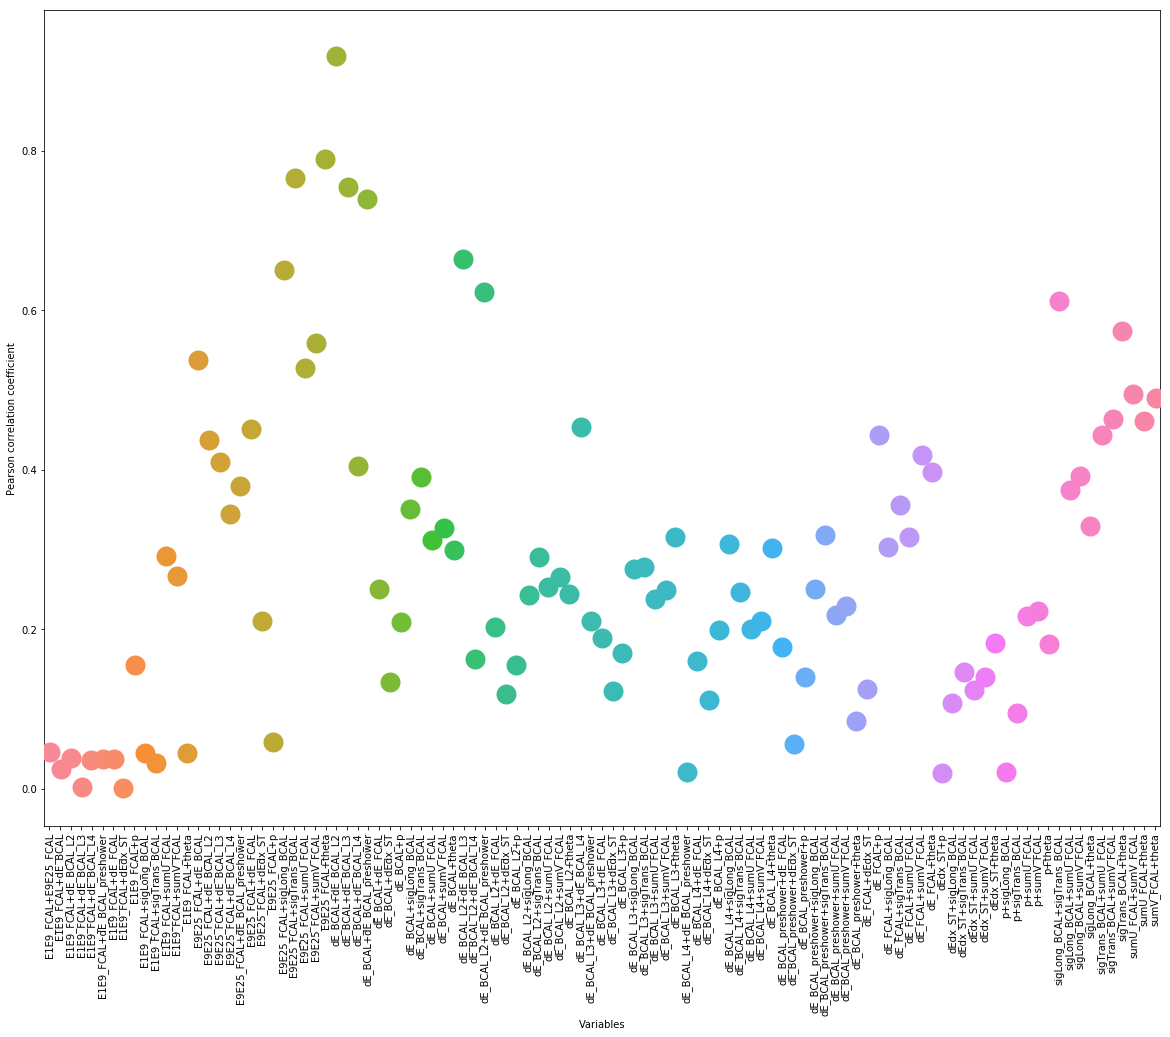

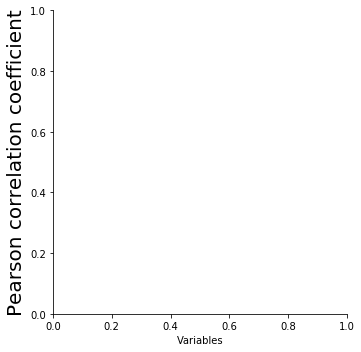

In [10]:
p_corrs = {}
count1=0
for col1 in pearsoncorr.columns:
    count2=1
    for col2 in pearsoncorr.columns:
        if col1 == col2:
            continue
        if col1+'+'+col2 not in p_corrs.keys():
            if col2+'+'+col1 in p_corrs.keys():
                continue
            p_corrs[col1+'+'+col2]=fabs(pearsoncorr[col1][col2])
        count2+=1
    count1+=1

s1 = Series(list(p_corrs.values()),name='Pearson correlation coefficient')
s2 = Series(list(p_corrs.keys()),name='Variables')
corr_df = concat([s1,s2],axis=1)

var_list = []
var_count = {}
corr_cut = 0.5
for variables in list(corr_df[corr_df['Pearson correlation coefficient']>corr_cut]['Variables']):
    var1,var2 = variables.split('+')
    print(var1,var2)
    if var1 not in var_list:
        var_list.append(var1)
    if var2 not in var_list:
        var_list.append(var2)
    if var1 not in var_count.keys():
        var_count[var1]=1
    else:
        var_count[var1]+=1
    if var2 not in var_count.keys():
        var_count[var2]=1
    else:
        var_count[var2]+=1
        
print(var_list)
print(var_count)

%matplotlib inline
fig,ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
catplot(x='Variables',y='Pearson correlation coefficient',data=corr_df,ax=ax,alpha=1,s=20)
plt.ylabel('Pearson correlation coefficient',fontsize=20)
fig.savefig('pearson_cc.pdf')

Index(['E1E9_FCAL', 'E9E25_FCAL', 'dE_BCAL', 'dE_BCAL_L2', 'dE_BCAL_L3',
       'dE_BCAL_L4', 'dE_BCAL_preshower', 'dE_FCAL', 'dEdx_ST', 'p',
       'sigLong_BCAL', 'sigTrans_BCAL', 'sumU_FCAL', 'sumV_FCAL', 'theta',
       'particle_id'],
      dtype='object')


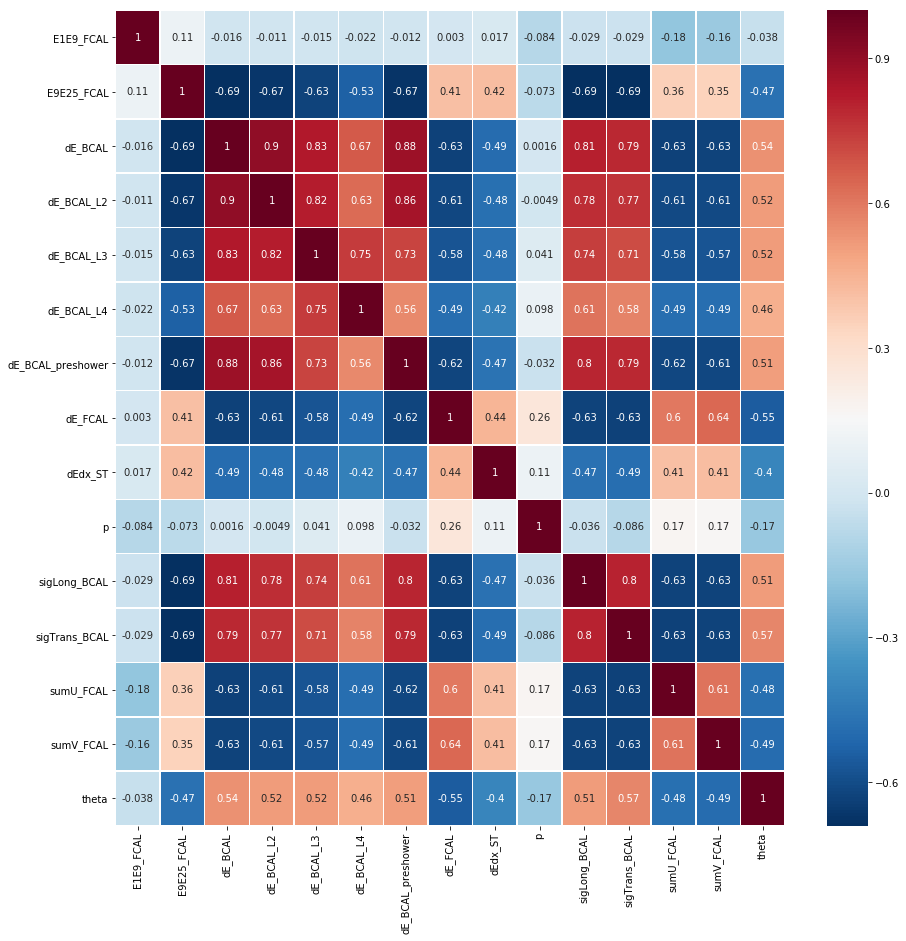

In [20]:
fig,ax = plt.subplots(figsize=(15,15))
kendallcorr = pid_ep.selected_pid.corr(method='kendall')
%matplotlib inline
heatmap(kendallcorr, xticklabels=kendallcorr.columns, yticklabels=kendallcorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5,ax=ax)
print(pid_ep.selected_pid.columns)
fig

(15, 15)


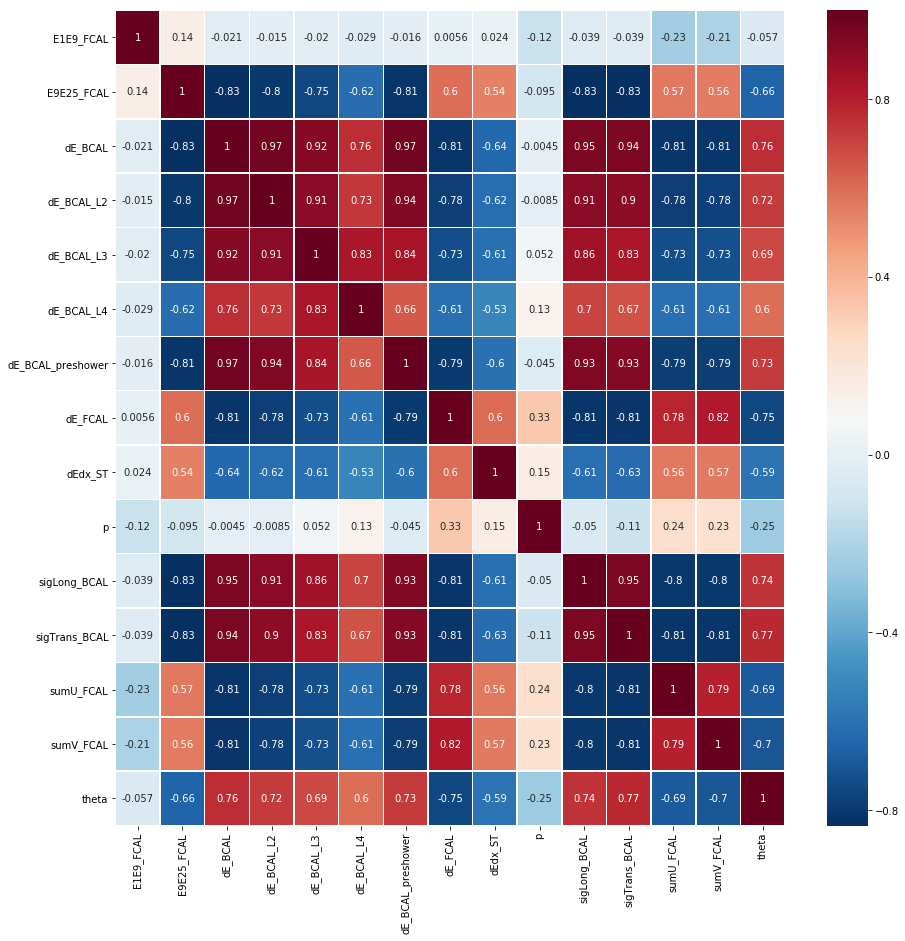

In [21]:
fig,ax = plt.subplots(figsize=(15,15))
spearmancorr = pid_ep.selected_pid.corr(method='spearman')
print(spearmancorr.shape)
%matplotlib inline
heatmap(spearmancorr, xticklabels=spearmancorr.columns, yticklabels=spearmancorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5,ax=ax)
fig

## Chi square

Check the chi square.

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
num_feats=7
X_norm = MinMaxScaler().fit_transform(pid_ep.X)
print(X_norm.shape)
pid_ep.binarize_y()
chi_vals = chi2(X_norm, pid_ep.binarized_y)

chi_dict = {}
count = 0
for column in pid_ep.X.columns:
    chi_dict[column] = (chi_vals[0][count],chi_vals[1][count])
    count+=1
    
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, pid_ep.y)
chi_support = chi_selector.get_support()
chi_feature = pid_ep.X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_dict)
print(chi_feature)
#heatmap(chi_feature[0], xticklabels=pid_ep.x_features, yticklabels=pid_ep.x_features,cmap='RdBu_r',annot=True,linewidth=0.5)

(20452, 15)
7 selected features
{'E1E9_FCAL': (52.90661279971205, 3.4978991670396524e-13), 'E9E25_FCAL': (337.5805849808721, 2.1467506496030398e-75), 'dE_BCAL': (61.22853211679511, 5.081968486421143e-15), 'dE_BCAL_L2': (137.6744578795954, 8.585893997672151e-32), 'dE_BCAL_L3': (1.8016450720984898, 0.179513740852395), 'dE_BCAL_L4': (135.45038422057297, 2.631622263751092e-31), 'dE_BCAL_preshower': (177.63844763571853, 1.5887715400197054e-40), 'dE_FCAL': (998.4241406999181, 3.951856592818456e-219), 'dEdx_ST': (1.0451391073149086, 0.30662925628225096), 'p': (76.69689565170845, 1.993164310294614e-18), 'sigLong_BCAL': (59.969234801057056, 9.635175247837588e-15), 'sigTrans_BCAL': (14.704163246940485, 0.00012576839144385685), 'sumU_FCAL': (0.08225344467704858, 0.7742665246707231), 'sumV_FCAL': (41.432147599479265, 1.2203393508176054e-10), 'theta': (253.9248256549971, 3.620915363425224e-57)}
['E9E25_FCAL', 'dE_BCAL_L2', 'dE_BCAL_L4', 'dE_BCAL_preshower', 'dE_FCAL', 'p', 'theta']


# Embedded method

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Best alpha using built-in LassoCV: 0.000301
Best score using built-in LassoCV: 0.507511
Lasso picked 12 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

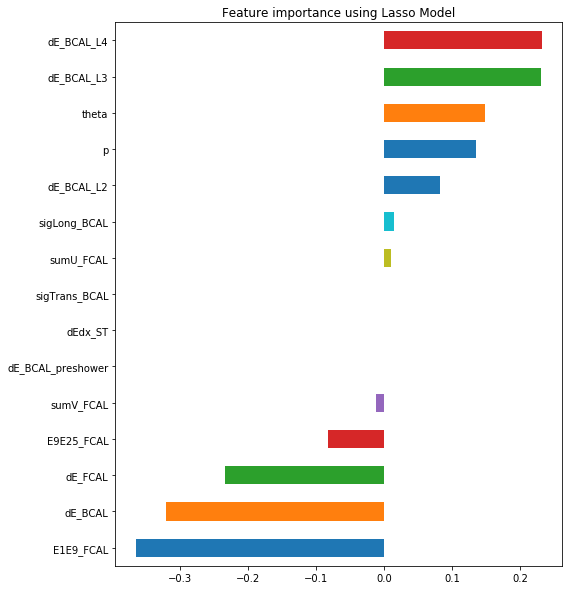

In [23]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(pid_ep.X,pid_ep.binarized_y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(pid_ep.X,pid_ep.binarized_y))

coef = Series(reg.coef_, index = pid_ep.X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Random Forest
Implement a random forest to measure feature importance.

Changing the max_features parameter can affect the ordering of importance below the top 3. The default is 'auto', or the total number of features used. As suggested by the documentation here (https://scikit-learn.org/stable/modules/ensemble.html#parameters) max_features='sqrt' is better for classification problems. Here it reduces computation time and changes ordering as mentioned above. May tune this in future by checking accuracy

In [24]:
from sklearn.ensemble import RandomForestRegressor
from numpy import ravel, argsort

labels = pid_ep.X.columns

X_rf = pid_ep.X
y_rf = pid_ep.binarized_y

# n_estimator val used is suggested by scikit. No improvement seen when increased to 500
rf = RandomForestRegressor(n_estimators=100, max_features='auto') 
rf.fit(pid_ep.X, ravel(pid_ep.binarized_y)) # use ravel, as it requires target to be a 1-D array

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Graph Results of the Random Forest

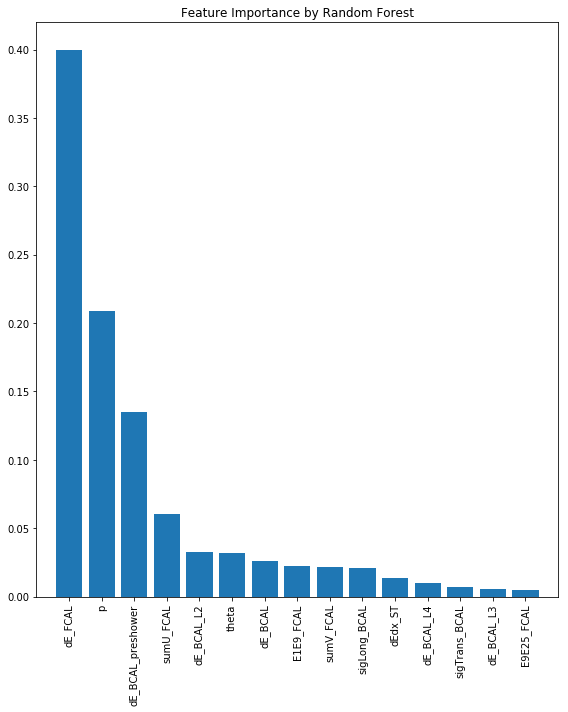

In [25]:
importances = rf.feature_importances_
indices = argsort(importances)[::-1]

plt.title('Feature Importance by Random Forest')
plt.bar(range(X_rf.shape[1]), importances[indices], align='center')
plt.xticks(range(X_rf.shape[1]), labels[indices], rotation=90)
plt.xlim([-1, X_rf.shape[1]])
plt.tight_layout()
plt.show()

# PCA

Use principle component analysis. Interpretability issue with these methods.

Index(['E1E9_FCAL', 'E9E25_FCAL', 'dE_BCAL', 'dE_BCAL_L2', 'dE_BCAL_L3',
       'dE_BCAL_L4', 'dE_BCAL_preshower', 'dE_FCAL', 'dEdx_ST', 'p',
       'sigLong_BCAL', 'sigTrans_BCAL', 'sumU_FCAL', 'sumV_FCAL', 'theta'],
      dtype='object')


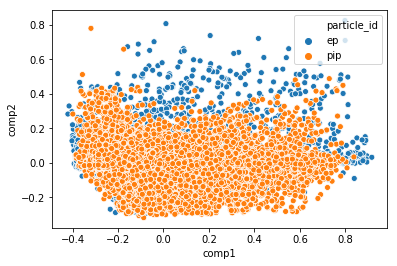

In [77]:

print(pid_ep.X.columns)
X_pca = PCA().fit_transform(X_norm)
X_selected = X_pca[:,:2]

s1 = Series(array(X_pca[:,1]),name='comp1')
s2 = Series(X_pca[:,5],name='comp2')

df = concat([s1,s2,pid_ep.y.reset_index(drop=True)],axis=1)
df.rename(columns={'comp1':'comp1','comp2':'comp2',0:'particle_id'},inplace=True)

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
scatterplot(x='comp1',y='comp2',hue='particle_id',data=df)

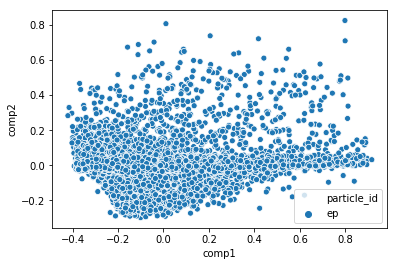

In [78]:
scatterplot(x='comp1',y='comp2',hue='particle_id',data=df[df['particle_id']=='ep'])


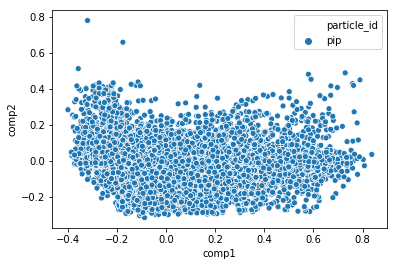

In [79]:
scatterplot(x='comp1',y='comp2',hue='particle_id',data=df[df['particle_id']=='pip'])


# Shuffle data frame object

Shuffle the data frame object in preparation for splitting or performing cross validation. It is important to do this when you mix different particle species, so these are not grouped.

In [7]:
pid_ep.shuffle_df()

# Split the data into a training and test set

Using a fraction of the whole data set for the test size, split the data frame object into a training and testing set. 

In [8]:
pid_ep.split_df()

# K fold cross validation set up

Looping over the folds produced from KFold for cross validation. 

In [ ]:
pid_ep.k_fold_cv()
for train_index, test_index in pid_ep.pid_k_fold_split:
    X = pid_ep.pid.drop(columns=['particle_id'])
    y = pid_ep.pid.particle_id
    x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

# Leave one out cross validation set up

Looping over the folds produced from LeaveOneOut for cross validation.

In [ ]:
pid_ep.leave_one_out_cv()
for train_index, test_index in pid_ep.pid_leave_one_out_split:
    X = pid_ep.pid.drop(columns=['particle_id'])
    y = pid_ep.pid['particle_id']
    x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

# Next work

Need to perform feature selection. We can begin with the standard from what has been done before in particle physics. Need to begin the implementation of algorithms here.